In [1]:
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [2]:
def read_in_and_split_data(iris_data):
    data, target = iris_data['data'], iris_data['target']
    train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size=0.1)
    return train_data, test_data, train_targets, test_targets

In [3]:
# to generate the test and training data.
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [4]:
train_data.shape

(135, 4)

In [5]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [6]:
def get_model(input_shape):

    model = Sequential([
        Dense(64, activation='relu', kernel_initializer=tf.initializers.he_normal(), 
              bias_initializer=tf.initializers.Constant(1.0), input_shape=(input_shape)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [7]:
# get model
model = get_model(train_data[0].shape)

In [8]:
def compile_model(model):
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
compile_model(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

In [10]:
def train_model(model, train_data, train_targets, epochs):
    
    history = model.fit(train_data, train_targets, epochs=epochs, batch_size=32, validation_split=0.15, verbose=1)
    
    return history

In [11]:
# train model
history = train_model(model, train_data, train_targets, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 2s 360ms/step - loss: 1.0607 - accuracy: 0.3159 - val_loss: 0.9664 - val_accuracy: 0.6190
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.9823 - accuracy: 0.5060 - val_loss: 0.9351 - val_accuracy: 0.5714
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.9425 - accuracy: 0.6879 - val_loss: 0.9053 - val_accuracy: 0.5714
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8943 - accuracy: 0.6904 - val_loss: 0.8681 - val_accuracy: 0.5714
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8401 - accuracy: 0.7195 - val_loss: 0.8295 - val_accuracy: 0.5714
Epoch 6/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.7928 - accuracy: 0.6897 - val_loss: 0.7864 - val_accuracy: 0.6190
Epoch 7/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7493 - accuracy: 0.7203 - val_loss: 0.7470 - val_accuracy: 0.9048
Epoch 8/1000

Epoch 59/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1168 - accuracy: 0.9738 - val_loss: 0.2109 - val_accuracy: 0.9048
Epoch 60/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1152 - accuracy: 0.9645 - val_loss: 0.1814 - val_accuracy: 0.9524
Epoch 61/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1067 - accuracy: 0.9794 - val_loss: 0.1693 - val_accuracy: 0.9524
Epoch 62/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1114 - accuracy: 0.9850 - val_loss: 0.1743 - val_accuracy: 0.9524
Epoch 63/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0981 - accuracy: 0.9857 - val_loss: 0.1863 - val_accuracy: 0.9524
Epoch 64/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0812 - accuracy: 0.9822 - val_loss: 0.1707 - val_accuracy: 0.9524
Epoch 65/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0930 - accuracy: 0.9787 - val_loss: 0.1649 - val_accuracy: 0.9524
Epoch 

4/4 [==============================] - 0s 14ms/step - loss: 0.0411 - accuracy: 0.9794 - val_loss: 0.2456 - val_accuracy: 0.9524
Epoch 117/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0493 - accuracy: 0.9728 - val_loss: 0.2232 - val_accuracy: 0.9524
Epoch 118/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0322 - accuracy: 0.9944 - val_loss: 0.1997 - val_accuracy: 0.9524
Epoch 119/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.2235 - val_accuracy: 0.9524
Epoch 120/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0379 - accuracy: 0.9853 - val_loss: 0.2218 - val_accuracy: 0.9524
Epoch 121/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.9944 - val_loss: 0.1943 - val_accuracy: 0.9048
Epoch 122/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.2424 - val_accuracy: 0.9524
Epoch 123/1000

4/4 [==============================] - 0s 18ms/step - loss: 0.0384 - accuracy: 0.9738 - val_loss: 0.3029 - val_accuracy: 0.9524
Epoch 174/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0333 - accuracy: 0.9857 - val_loss: 0.2358 - val_accuracy: 0.9524
Epoch 175/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.2313 - val_accuracy: 0.9524
Epoch 176/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.9965 - val_loss: 0.2614 - val_accuracy: 0.9524
Epoch 177/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0452 - accuracy: 0.9701 - val_loss: 0.2478 - val_accuracy: 0.9524
Epoch 178/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0252 - accuracy: 0.9909 - val_loss: 0.2562 - val_accuracy: 0.9524
Epoch 179/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0305 - accuracy: 0.9944 - val_loss: 0.2341 - val_accuracy: 0.9048
Epoch 180/1000

4/4 [==============================] - 0s 17ms/step - loss: 0.0360 - accuracy: 0.9763 - val_loss: 0.2878 - val_accuracy: 0.9524
Epoch 231/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0214 - accuracy: 0.9913 - val_loss: 0.2689 - val_accuracy: 0.9524
Epoch 232/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0277 - accuracy: 0.9965 - val_loss: 0.2788 - val_accuracy: 0.9524
Epoch 233/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0283 - accuracy: 0.9850 - val_loss: 0.2802 - val_accuracy: 0.9524
Epoch 234/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0275 - accuracy: 0.9850 - val_loss: 0.2766 - val_accuracy: 0.9524
Epoch 235/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.2766 - val_accuracy: 0.9524
Epoch 236/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0315 - accuracy: 0.9888 - val_loss: 0.2893 - val_accuracy: 0.9524
Epoch 237/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.3067 - val_accuracy: 0.9524
Epoch 288/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0250 - accuracy: 0.9794 - val_loss: 0.3233 - val_accuracy: 0.9524
Epoch 289/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0191 - accuracy: 0.9888 - val_loss: 0.2987 - val_accuracy: 0.9524
Epoch 290/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.3011 - val_accuracy: 0.9524
Epoch 291/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0227 - accuracy: 0.9913 - val_loss: 0.3144 - val_accuracy: 0.9524
Epoch 292/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0328 - accuracy: 0.9850 - val_loss: 0.3042 - val_accuracy: 0.9524
Epoch 293/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0143 - accuracy: 0.9944 - val_loss: 0.3115 - val_accuracy: 0.9524
Epoch 294/1000

4/4 [==============================] - 0s 17ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.3486 - val_accuracy: 0.9524
Epoch 345/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0278 - accuracy: 0.9857 - val_loss: 0.3443 - val_accuracy: 0.9524
Epoch 346/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.3082 - val_accuracy: 0.9048
Epoch 347/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0293 - accuracy: 0.9888 - val_loss: 0.3374 - val_accuracy: 0.9524
Epoch 348/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0279 - accuracy: 0.9794 - val_loss: 0.3635 - val_accuracy: 0.9524
Epoch 349/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.9850 - val_loss: 0.3158 - val_accuracy: 0.9524
Epoch 350/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.3248 - val_accuracy: 0.9524
Epoch 351/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.3540 - val_accuracy: 0.9524
Epoch 402/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0318 - accuracy: 0.9857 - val_loss: 0.3404 - val_accuracy: 0.9524
Epoch 403/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0207 - accuracy: 0.9913 - val_loss: 0.3262 - val_accuracy: 0.9524
Epoch 404/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.3689 - val_accuracy: 0.9524
Epoch 405/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0344 - accuracy: 0.9794 - val_loss: 0.3399 - val_accuracy: 0.9524
Epoch 406/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.3249 - val_accuracy: 0.9048
Epoch 407/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.3449 - val_accuracy: 0.9524
Epoch 408/1000

4/4 [==============================] - 0s 20ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.3545 - val_accuracy: 0.9048
Epoch 459/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0144 - accuracy: 0.9944 - val_loss: 0.3790 - val_accuracy: 0.9524
Epoch 460/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0234 - accuracy: 0.9850 - val_loss: 0.3567 - val_accuracy: 0.9524
Epoch 461/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.3609 - val_accuracy: 0.9524
Epoch 462/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0103 - accuracy: 0.9909 - val_loss: 0.3696 - val_accuracy: 0.9524
Epoch 463/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0261 - accuracy: 0.9874 - val_loss: 0.3623 - val_accuracy: 0.9524
Epoch 464/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0405 - accuracy: 0.9888 - val_loss: 0.4385 - val_accuracy: 0.9524
Epoch 465/1000

4/4 [==============================] - 0s 18ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.3744 - val_accuracy: 0.9524
Epoch 516/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.3767 - val_accuracy: 0.9524
Epoch 517/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.3819 - val_accuracy: 0.9524
Epoch 518/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.3825 - val_accuracy: 0.9524
Epoch 519/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.3808 - val_accuracy: 0.9524
Epoch 520/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.3995 - val_accuracy: 0.9524
Epoch 521/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0132 - accuracy: 0.9944 - val_loss: 0.3858 - val_accuracy: 0.9524
Epoch 522/1000

4/4 [==============================] - 0s 18ms/step - loss: 0.0158 - accuracy: 0.9913 - val_loss: 0.3504 - val_accuracy: 0.9524
Epoch 573/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.3561 - val_accuracy: 0.9524
Epoch 574/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0092 - accuracy: 0.9944 - val_loss: 0.3547 - val_accuracy: 0.9524
Epoch 575/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.3481 - val_accuracy: 0.9048
Epoch 576/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.3541 - val_accuracy: 0.9524
Epoch 577/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.3595 - val_accuracy: 0.9524
Epoch 578/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.3519 - val_accuracy: 0.9524
Epoch 579/1000

4/4 [==============================] - 0s 19ms/step - loss: 0.0104 - accuracy: 0.9944 - val_loss: 0.3774 - val_accuracy: 0.9524
Epoch 630/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.3773 - val_accuracy: 0.9048
Epoch 631/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.3968 - val_accuracy: 0.9524
Epoch 632/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0129 - accuracy: 0.9913 - val_loss: 0.3833 - val_accuracy: 0.9524
Epoch 633/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.3796 - val_accuracy: 0.9524
Epoch 634/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0074 - accuracy: 0.9965 - val_loss: 0.4087 - val_accuracy: 0.9524
Epoch 635/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.3768 - val_accuracy: 0.9524
Epoch 636/1000

4/4 [==============================] - 0s 19ms/step - loss: 0.0128 - accuracy: 0.9913 - val_loss: 0.4056 - val_accuracy: 0.9048
Epoch 687/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.4133 - val_accuracy: 0.9524
Epoch 688/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0181 - accuracy: 0.9909 - val_loss: 0.4377 - val_accuracy: 0.9524
Epoch 689/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0318 - accuracy: 0.9850 - val_loss: 0.4759 - val_accuracy: 0.9048
Epoch 690/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0377 - accuracy: 0.9791 - val_loss: 0.4251 - val_accuracy: 0.9524
Epoch 691/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0536 - accuracy: 0.9759 - val_loss: 0.5195 - val_accuracy: 0.9048
Epoch 692/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1491 - accuracy: 0.9763 - val_loss: 0.3876 - val_accuracy: 0.9524
Epoch 693/1000

4/4 [==============================] - 0s 22ms/step - loss: 0.0724 - accuracy: 0.9651 - val_loss: 0.4205 - val_accuracy: 0.9524
Epoch 744/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0514 - accuracy: 0.9909 - val_loss: 0.4974 - val_accuracy: 0.9524
Epoch 745/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.2124 - accuracy: 0.9551 - val_loss: 0.3543 - val_accuracy: 0.9524
Epoch 746/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0073 - accuracy: 0.9965 - val_loss: 0.3209 - val_accuracy: 0.9048
Epoch 747/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3330 - val_accuracy: 0.9524
Epoch 748/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.3231 - val_accuracy: 0.9524
Epoch 749/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0087 - accuracy: 0.9913 - val_loss: 0.3021 - val_accuracy: 0.9524
Epoch 750/1000

4/4 [==============================] - 0s 20ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.3934 - val_accuracy: 0.9524
Epoch 801/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3968 - val_accuracy: 0.9524
Epoch 802/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.3955 - val_accuracy: 0.9524
Epoch 803/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3967 - val_accuracy: 0.9524
Epoch 804/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.4009 - val_accuracy: 0.9048
Epoch 805/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.4030 - val_accuracy: 0.9524
Epoch 806/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0059 - accuracy: 0.9965 - val_loss: 0.4011 - val_accuracy: 0.9524
Epoch 807/1000

4/4 [==============================] - 0s 17ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.9524
Epoch 858/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3945 - val_accuracy: 0.9524
Epoch 859/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3977 - val_accuracy: 0.9524
Epoch 860/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.4019 - val_accuracy: 0.9524
Epoch 861/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3994 - val_accuracy: 0.9524
Epoch 862/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.4010 - val_accuracy: 0.9524
Epoch 863/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4022 - val_accuracy: 0.9524
Epoch 864/1000

4/4 [==============================] - 0s 20ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.4401 - val_accuracy: 0.9524
Epoch 915/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4399 - val_accuracy: 0.9524
Epoch 916/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4365 - val_accuracy: 0.9524
Epoch 917/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4373 - val_accuracy: 0.9524
Epoch 918/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4398 - val_accuracy: 0.9524
Epoch 919/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4404 - val_accuracy: 0.9524
Epoch 920/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4373 - val_accuracy: 0.9524
Epoch 921/1000

4/4 [==============================] - 0s 18ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.2749 - val_accuracy: 0.9048
Epoch 972/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.2841 - val_accuracy: 0.9524
Epoch 973/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2919 - val_accuracy: 0.9524
Epoch 974/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0114 - accuracy: 0.9913 - val_loss: 0.2845 - val_accuracy: 0.9524
Epoch 975/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.2851 - val_accuracy: 0.9524
Epoch 976/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.2981 - val_accuracy: 0.9524
Epoch 977/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.3045 - val_accuracy: 0.9524
Epoch 978/1000

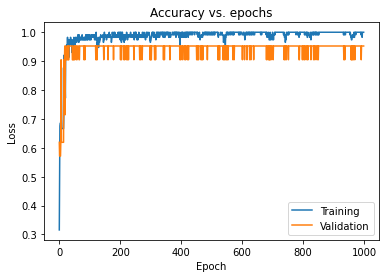

In [12]:
# plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

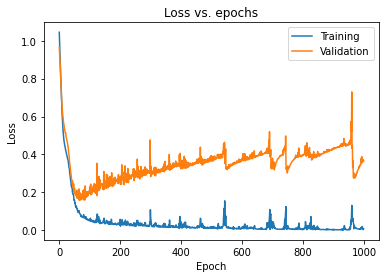

In [13]:
# plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [14]:
def get_regularized_model(input_shape, dropout_rate, weight_decay,):

    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), kernel_initializer=tf.initializers.he_normal(), 
              bias_initializer=tf.initializers.Constant(1.0), input_shape=(input_shape)),
        Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay),),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay),),
        Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay),),
        BatchNormalization(),
        Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay),),
        Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay),),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay),),
        Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay),),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay),),
        Dense(3, activation='softmax'),
    ])
    return model

In [15]:
reg_model = get_regularized_model(train_data[0].shape, 0.3, 0.001)
compile_model(reg_model)

In [16]:
reg_history = train_model(reg_model, train_data, train_targets, epochs=900)

Epoch 1/900
4/4 [==============================] - 2s 118ms/step - loss: 1.9970 - accuracy: 0.3622 - val_loss: 1.9793 - val_accuracy: 0.1905
Epoch 2/900
4/4 [==============================] - 0s 19ms/step - loss: 1.9449 - accuracy: 0.4072 - val_loss: 1.9722 - val_accuracy: 0.1905
Epoch 3/900
4/4 [==============================] - 0s 17ms/step - loss: 1.9756 - accuracy: 0.3397 - val_loss: 1.9628 - val_accuracy: 0.1905
Epoch 4/900
4/4 [==============================] - 0s 18ms/step - loss: 1.9845 - accuracy: 0.4211 - val_loss: 1.9556 - val_accuracy: 0.1905
Epoch 5/900
4/4 [==============================] - 0s 17ms/step - loss: 1.9529 - accuracy: 0.3936 - val_loss: 1.9483 - val_accuracy: 0.1905
Epoch 6/900
4/4 [==============================] - 0s 17ms/step - loss: 1.9626 - accuracy: 0.4058 - val_loss: 1.9416 - val_accuracy: 0.1905
Epoch 7/900
4/4 [==============================] - 0s 17ms/step - loss: 1.9733 - accuracy: 0.3173 - val_loss: 1.9337 - val_accuracy: 0.1905
Epoch 8/900
4/4 [==

Epoch 59/900
4/4 [==============================] - 0s 18ms/step - loss: 1.3609 - accuracy: 0.6708 - val_loss: 1.3687 - val_accuracy: 0.6190
Epoch 60/900
4/4 [==============================] - 0s 19ms/step - loss: 1.3912 - accuracy: 0.6474 - val_loss: 1.3631 - val_accuracy: 0.6190
Epoch 61/900
4/4 [==============================] - 0s 19ms/step - loss: 1.3355 - accuracy: 0.6948 - val_loss: 1.3581 - val_accuracy: 0.6190
Epoch 62/900
4/4 [==============================] - 0s 17ms/step - loss: 1.3292 - accuracy: 0.6807 - val_loss: 1.3534 - val_accuracy: 0.6190
Epoch 63/900
4/4 [==============================] - 0s 17ms/step - loss: 1.3558 - accuracy: 0.6855 - val_loss: 1.3485 - val_accuracy: 0.6190
Epoch 64/900
4/4 [==============================] - 0s 17ms/step - loss: 1.3054 - accuracy: 0.6840 - val_loss: 1.3431 - val_accuracy: 0.6190
Epoch 65/900
4/4 [==============================] - 0s 18ms/step - loss: 1.3531 - accuracy: 0.6275 - val_loss: 1.3379 - val_accuracy: 0.6190
Epoch 66/900


Epoch 117/900
4/4 [==============================] - 0s 17ms/step - loss: 1.1923 - accuracy: 0.7253 - val_loss: 1.1623 - val_accuracy: 0.9048
Epoch 118/900
4/4 [==============================] - 0s 20ms/step - loss: 1.1541 - accuracy: 0.8086 - val_loss: 1.1568 - val_accuracy: 0.9048
Epoch 119/900
4/4 [==============================] - 0s 18ms/step - loss: 1.1997 - accuracy: 0.7786 - val_loss: 1.1507 - val_accuracy: 0.9048
Epoch 120/900
4/4 [==============================] - 0s 19ms/step - loss: 1.1777 - accuracy: 0.8016 - val_loss: 1.1457 - val_accuracy: 0.9048
Epoch 121/900
4/4 [==============================] - 0s 19ms/step - loss: 1.2009 - accuracy: 0.7999 - val_loss: 1.1408 - val_accuracy: 0.9048
Epoch 122/900
4/4 [==============================] - 0s 20ms/step - loss: 1.1568 - accuracy: 0.7963 - val_loss: 1.1355 - val_accuracy: 0.9048
Epoch 123/900
4/4 [==============================] - 0s 19ms/step - loss: 1.1659 - accuracy: 0.7925 - val_loss: 1.1291 - val_accuracy: 0.9524
Epoch 

Epoch 175/900
4/4 [==============================] - 0s 20ms/step - loss: 0.8907 - accuracy: 0.9598 - val_loss: 0.9044 - val_accuracy: 0.9048
Epoch 176/900
4/4 [==============================] - 0s 19ms/step - loss: 0.9497 - accuracy: 0.9320 - val_loss: 0.9036 - val_accuracy: 0.9048
Epoch 177/900
4/4 [==============================] - 0s 19ms/step - loss: 0.8991 - accuracy: 0.9411 - val_loss: 0.9036 - val_accuracy: 0.9048
Epoch 178/900
4/4 [==============================] - 0s 20ms/step - loss: 0.8599 - accuracy: 0.9797 - val_loss: 0.9050 - val_accuracy: 0.9048
Epoch 179/900
4/4 [==============================] - 0s 21ms/step - loss: 0.9851 - accuracy: 0.8951 - val_loss: 0.9062 - val_accuracy: 0.9048
Epoch 180/900
4/4 [==============================] - 0s 18ms/step - loss: 0.9057 - accuracy: 0.9323 - val_loss: 0.9067 - val_accuracy: 0.9048
Epoch 181/900
4/4 [==============================] - 0s 21ms/step - loss: 0.9070 - accuracy: 0.9348 - val_loss: 0.9067 - val_accuracy: 0.9048
Epoch 

Epoch 233/900
4/4 [==============================] - 0s 21ms/step - loss: 0.7981 - accuracy: 0.9460 - val_loss: 0.9269 - val_accuracy: 0.9048
Epoch 234/900
4/4 [==============================] - 0s 19ms/step - loss: 0.7989 - accuracy: 0.9477 - val_loss: 0.9309 - val_accuracy: 0.9524
Epoch 235/900
4/4 [==============================] - 0s 18ms/step - loss: 0.7920 - accuracy: 0.9735 - val_loss: 0.9354 - val_accuracy: 0.9524
Epoch 236/900
4/4 [==============================] - 0s 18ms/step - loss: 0.7656 - accuracy: 0.9815 - val_loss: 0.9356 - val_accuracy: 0.9524
Epoch 237/900
4/4 [==============================] - 0s 17ms/step - loss: 0.8173 - accuracy: 0.9498 - val_loss: 0.9350 - val_accuracy: 0.9524
Epoch 238/900
4/4 [==============================] - 0s 21ms/step - loss: 0.8011 - accuracy: 0.9644 - val_loss: 0.9310 - val_accuracy: 0.9048
Epoch 239/900
4/4 [==============================] - 0s 19ms/step - loss: 0.8096 - accuracy: 0.9610 - val_loss: 0.9314 - val_accuracy: 0.9048
Epoch 

Epoch 291/900
4/4 [==============================] - 0s 23ms/step - loss: 0.7710 - accuracy: 0.9589 - val_loss: 0.9231 - val_accuracy: 0.9048
Epoch 292/900
4/4 [==============================] - 0s 17ms/step - loss: 0.7355 - accuracy: 0.9822 - val_loss: 0.9157 - val_accuracy: 0.9048
Epoch 293/900
4/4 [==============================] - 0s 18ms/step - loss: 0.7752 - accuracy: 0.9651 - val_loss: 0.8993 - val_accuracy: 0.9048
Epoch 294/900
4/4 [==============================] - 0s 20ms/step - loss: 0.8146 - accuracy: 0.9589 - val_loss: 0.8894 - val_accuracy: 0.9048
Epoch 295/900
4/4 [==============================] - 0s 17ms/step - loss: 0.7938 - accuracy: 0.9310 - val_loss: 0.8982 - val_accuracy: 0.9048
Epoch 296/900
4/4 [==============================] - 0s 19ms/step - loss: 0.7580 - accuracy: 0.9850 - val_loss: 0.9058 - val_accuracy: 0.9048
Epoch 297/900
4/4 [==============================] - 0s 19ms/step - loss: 0.7356 - accuracy: 0.9728 - val_loss: 0.9124 - val_accuracy: 0.9048
Epoch 

4/4 [==============================] - 0s 20ms/step - loss: 0.7316 - accuracy: 0.9759 - val_loss: 0.9096 - val_accuracy: 0.9048
Epoch 349/900
4/4 [==============================] - 0s 17ms/step - loss: 0.6883 - accuracy: 0.9759 - val_loss: 0.8977 - val_accuracy: 0.9048
Epoch 350/900
4/4 [==============================] - 0s 20ms/step - loss: 0.7343 - accuracy: 0.9595 - val_loss: 0.9090 - val_accuracy: 0.9048
Epoch 351/900
4/4 [==============================] - 0s 19ms/step - loss: 0.7163 - accuracy: 0.9731 - val_loss: 0.9207 - val_accuracy: 0.9048
Epoch 352/900
4/4 [==============================] - 0s 17ms/step - loss: 0.7417 - accuracy: 0.9404 - val_loss: 0.9231 - val_accuracy: 0.9048
Epoch 353/900
4/4 [==============================] - 0s 18ms/step - loss: 0.6946 - accuracy: 0.9822 - val_loss: 0.9248 - val_accuracy: 0.9048
Epoch 354/900
4/4 [==============================] - 0s 19ms/step - loss: 0.7599 - accuracy: 0.9641 - val_loss: 0.9249 - val_accuracy: 0.9048
Epoch 355/900
4/4 [=

Epoch 406/900
4/4 [==============================] - 0s 20ms/step - loss: 0.6869 - accuracy: 0.9728 - val_loss: 0.8851 - val_accuracy: 0.9048
Epoch 407/900
4/4 [==============================] - 0s 19ms/step - loss: 0.6430 - accuracy: 1.0000 - val_loss: 0.8910 - val_accuracy: 0.9048
Epoch 408/900
4/4 [==============================] - 0s 19ms/step - loss: 0.6917 - accuracy: 0.9728 - val_loss: 0.8886 - val_accuracy: 0.9048
Epoch 409/900
4/4 [==============================] - 0s 23ms/step - loss: 0.6686 - accuracy: 0.9857 - val_loss: 0.8841 - val_accuracy: 0.9048
Epoch 410/900
4/4 [==============================] - 0s 21ms/step - loss: 0.6843 - accuracy: 0.9745 - val_loss: 0.8809 - val_accuracy: 0.9048
Epoch 411/900
4/4 [==============================] - 0s 19ms/step - loss: 0.7120 - accuracy: 0.9763 - val_loss: 0.8776 - val_accuracy: 0.9048
Epoch 412/900
4/4 [==============================] - 0s 19ms/step - loss: 0.6600 - accuracy: 0.9857 - val_loss: 0.8914 - val_accuracy: 0.9048
Epoch 

Epoch 464/900
4/4 [==============================] - 0s 20ms/step - loss: 0.6687 - accuracy: 0.9826 - val_loss: 0.9683 - val_accuracy: 0.9048
Epoch 465/900
4/4 [==============================] - 0s 22ms/step - loss: 0.6638 - accuracy: 0.9763 - val_loss: 0.9759 - val_accuracy: 0.9048
Epoch 466/900
4/4 [==============================] - 0s 20ms/step - loss: 0.6415 - accuracy: 0.9822 - val_loss: 0.9747 - val_accuracy: 0.9048
Epoch 467/900
4/4 [==============================] - 0s 19ms/step - loss: 0.7236 - accuracy: 0.9630 - val_loss: 0.9694 - val_accuracy: 0.9048
Epoch 468/900
4/4 [==============================] - 0s 19ms/step - loss: 0.6839 - accuracy: 0.9578 - val_loss: 0.9521 - val_accuracy: 0.9048
Epoch 469/900
4/4 [==============================] - 0s 20ms/step - loss: 0.6390 - accuracy: 0.9850 - val_loss: 0.9342 - val_accuracy: 0.9048
Epoch 470/900
4/4 [==============================] - 0s 21ms/step - loss: 0.6724 - accuracy: 0.9724 - val_loss: 0.9304 - val_accuracy: 0.9048
Epoch 

Epoch 522/900
4/4 [==============================] - 0s 22ms/step - loss: 0.6323 - accuracy: 0.9759 - val_loss: 0.9153 - val_accuracy: 0.9048
Epoch 523/900
4/4 [==============================] - 0s 19ms/step - loss: 0.6117 - accuracy: 0.9913 - val_loss: 0.9155 - val_accuracy: 0.9048
Epoch 524/900
4/4 [==============================] - 0s 20ms/step - loss: 0.6456 - accuracy: 0.9850 - val_loss: 0.9120 - val_accuracy: 0.9048
Epoch 525/900
4/4 [==============================] - 0s 20ms/step - loss: 0.6271 - accuracy: 0.9878 - val_loss: 0.9065 - val_accuracy: 0.9048
Epoch 526/900
4/4 [==============================] - 0s 19ms/step - loss: 0.7247 - accuracy: 0.9516 - val_loss: 0.8731 - val_accuracy: 0.9048
Epoch 527/900
4/4 [==============================] - 0s 20ms/step - loss: 0.6205 - accuracy: 0.9965 - val_loss: 0.8454 - val_accuracy: 0.9048
Epoch 528/900
4/4 [==============================] - 0s 20ms/step - loss: 0.6411 - accuracy: 0.9815 - val_loss: 0.8399 - val_accuracy: 0.9048
Epoch 

Epoch 580/900
4/4 [==============================] - 0s 19ms/step - loss: 0.6118 - accuracy: 0.9763 - val_loss: 0.8683 - val_accuracy: 0.9048
Epoch 581/900
4/4 [==============================] - 0s 20ms/step - loss: 0.6218 - accuracy: 0.9850 - val_loss: 0.8807 - val_accuracy: 0.9048
Epoch 582/900
4/4 [==============================] - 0s 20ms/step - loss: 0.5941 - accuracy: 0.9944 - val_loss: 0.8953 - val_accuracy: 0.9048
Epoch 583/900
4/4 [==============================] - 0s 23ms/step - loss: 0.6523 - accuracy: 0.9551 - val_loss: 0.9165 - val_accuracy: 0.9048
Epoch 584/900
4/4 [==============================] - 0s 23ms/step - loss: 0.5862 - accuracy: 0.9944 - val_loss: 0.9251 - val_accuracy: 0.9048
Epoch 585/900
4/4 [==============================] - 0s 25ms/step - loss: 0.5897 - accuracy: 0.9850 - val_loss: 0.9315 - val_accuracy: 0.9048
Epoch 586/900
4/4 [==============================] - 0s 23ms/step - loss: 0.5988 - accuracy: 0.9913 - val_loss: 0.9181 - val_accuracy: 0.9048
Epoch 

Epoch 638/900
4/4 [==============================] - 0s 20ms/step - loss: 0.5695 - accuracy: 0.9965 - val_loss: 0.8877 - val_accuracy: 0.9048
Epoch 639/900
4/4 [==============================] - 0s 21ms/step - loss: 0.5979 - accuracy: 0.9826 - val_loss: 0.8506 - val_accuracy: 0.9048
Epoch 640/900
4/4 [==============================] - 0s 19ms/step - loss: 0.5559 - accuracy: 1.0000 - val_loss: 0.8188 - val_accuracy: 0.9048
Epoch 641/900
4/4 [==============================] - 0s 17ms/step - loss: 0.5966 - accuracy: 0.9909 - val_loss: 0.7983 - val_accuracy: 0.9048
Epoch 642/900
4/4 [==============================] - 0s 19ms/step - loss: 0.5592 - accuracy: 0.9965 - val_loss: 0.7897 - val_accuracy: 0.9524
Epoch 643/900
4/4 [==============================] - 0s 16ms/step - loss: 0.5659 - accuracy: 0.9965 - val_loss: 0.7844 - val_accuracy: 0.9524
Epoch 644/900
4/4 [==============================] - 0s 21ms/step - loss: 0.5823 - accuracy: 0.9857 - val_loss: 0.7920 - val_accuracy: 0.9048
Epoch 

Epoch 696/900
4/4 [==============================] - 0s 19ms/step - loss: 0.5425 - accuracy: 1.0000 - val_loss: 0.8609 - val_accuracy: 0.9048
Epoch 697/900
4/4 [==============================] - 0s 18ms/step - loss: 0.5448 - accuracy: 1.0000 - val_loss: 0.8678 - val_accuracy: 0.9048
Epoch 698/900
4/4 [==============================] - 0s 21ms/step - loss: 0.5664 - accuracy: 0.9763 - val_loss: 0.8682 - val_accuracy: 0.9048
Epoch 699/900
4/4 [==============================] - 0s 19ms/step - loss: 0.5643 - accuracy: 1.0000 - val_loss: 0.8773 - val_accuracy: 0.9048
Epoch 700/900
4/4 [==============================] - 0s 17ms/step - loss: 0.5493 - accuracy: 1.0000 - val_loss: 0.8875 - val_accuracy: 0.9048
Epoch 701/900
4/4 [==============================] - 0s 19ms/step - loss: 0.5461 - accuracy: 1.0000 - val_loss: 0.9002 - val_accuracy: 0.9048
Epoch 702/900
4/4 [==============================] - 0s 17ms/step - loss: 0.5764 - accuracy: 0.9763 - val_loss: 0.9044 - val_accuracy: 0.9048
Epoch 

Epoch 754/900
4/4 [==============================] - 0s 20ms/step - loss: 0.5265 - accuracy: 1.0000 - val_loss: 0.8773 - val_accuracy: 0.9048
Epoch 755/900
4/4 [==============================] - 0s 17ms/step - loss: 0.5237 - accuracy: 1.0000 - val_loss: 0.8838 - val_accuracy: 0.9048
Epoch 756/900
4/4 [==============================] - 0s 18ms/step - loss: 0.5571 - accuracy: 0.9930 - val_loss: 0.8959 - val_accuracy: 0.9048
Epoch 757/900
4/4 [==============================] - 0s 21ms/step - loss: 0.5688 - accuracy: 0.9888 - val_loss: 0.9055 - val_accuracy: 0.9048
Epoch 758/900
4/4 [==============================] - 0s 21ms/step - loss: 0.5240 - accuracy: 1.0000 - val_loss: 0.9049 - val_accuracy: 0.9048
Epoch 759/900
4/4 [==============================] - 0s 18ms/step - loss: 0.5772 - accuracy: 0.9794 - val_loss: 0.8945 - val_accuracy: 0.9048
Epoch 760/900
4/4 [==============================] - 0s 17ms/step - loss: 0.6152 - accuracy: 0.9738 - val_loss: 0.8661 - val_accuracy: 0.9048
Epoch 

Epoch 812/900
4/4 [==============================] - 0s 18ms/step - loss: 0.5149 - accuracy: 0.9944 - val_loss: 0.8640 - val_accuracy: 0.9048
Epoch 813/900
4/4 [==============================] - 0s 19ms/step - loss: 0.5366 - accuracy: 0.9878 - val_loss: 0.8646 - val_accuracy: 0.9048
Epoch 814/900
4/4 [==============================] - 0s 19ms/step - loss: 0.5753 - accuracy: 0.9794 - val_loss: 0.8606 - val_accuracy: 0.9048
Epoch 815/900
4/4 [==============================] - 0s 21ms/step - loss: 0.5102 - accuracy: 1.0000 - val_loss: 0.8530 - val_accuracy: 0.9048
Epoch 816/900
4/4 [==============================] - 0s 23ms/step - loss: 0.5125 - accuracy: 0.9965 - val_loss: 0.8460 - val_accuracy: 0.9048
Epoch 817/900
4/4 [==============================] - 0s 19ms/step - loss: 0.5232 - accuracy: 0.9913 - val_loss: 0.8490 - val_accuracy: 0.9048
Epoch 818/900
4/4 [==============================] - 0s 20ms/step - loss: 0.5273 - accuracy: 0.9913 - val_loss: 0.8530 - val_accuracy: 0.9048
Epoch 

Epoch 870/900
4/4 [==============================] - 0s 22ms/step - loss: 0.4886 - accuracy: 1.0000 - val_loss: 0.8913 - val_accuracy: 0.9048
Epoch 871/900
4/4 [==============================] - 0s 20ms/step - loss: 0.4966 - accuracy: 0.9944 - val_loss: 0.8953 - val_accuracy: 0.9048
Epoch 872/900
4/4 [==============================] - 0s 17ms/step - loss: 0.4909 - accuracy: 1.0000 - val_loss: 0.8974 - val_accuracy: 0.9048
Epoch 873/900
4/4 [==============================] - 0s 20ms/step - loss: 0.5161 - accuracy: 0.9878 - val_loss: 0.8997 - val_accuracy: 0.9048
Epoch 874/900
4/4 [==============================] - 0s 19ms/step - loss: 0.5012 - accuracy: 1.0000 - val_loss: 0.8956 - val_accuracy: 0.9048
Epoch 875/900
4/4 [==============================] - 0s 20ms/step - loss: 0.5214 - accuracy: 0.9909 - val_loss: 0.8793 - val_accuracy: 0.9048
Epoch 876/900
4/4 [==============================] - 0s 21ms/step - loss: 0.5004 - accuracy: 0.9913 - val_loss: 0.8624 - val_accuracy: 0.9048
Epoch 

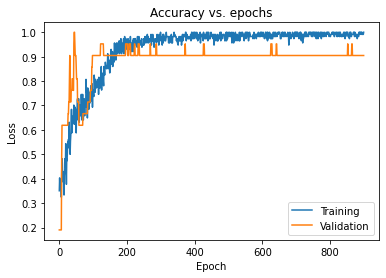

In [17]:
# plot the epoch vs accuracy graph
try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

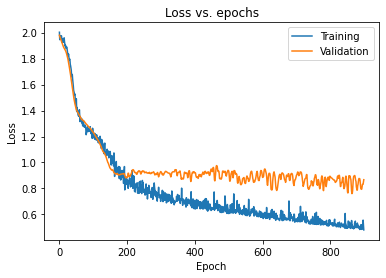

In [18]:
# plot the epoch vs loss graph
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()